<a href="https://colab.research.google.com/github/aumat/AutoML/blob/master/Classification_Auto_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data1.csv to train_data1 (1).csv


In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn
!pip install pandas~=0.24.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   201  100   201    0     0    452      0 --:--:-- --:--:-- --:--:--   453


In [ ]:
import pandas as pd

In [ ]:
import io
train_data1 = pd.read_csv(io.BytesIO(uploaded['train_data1.csv']))

In [ ]:
train_data1.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
Month                object
Year                  int64
Day                   int64
Date01                int64
dtype: object

In [ ]:
train_data1[['MULTIPLE_OFFENSE','Month','Year','Day','X_1','X_4','X_5','X_9']] = train_data1[['MULTIPLE_OFFENSE','Month','Year','Day','X_1','X_4','X_5','X_9']].apply(lambda x: x.astype('category'))

In [ ]:
train_data1.dtypes

INCIDENT_ID           object
DATE                  object
X_1                 category
X_2                    int64
X_3                    int64
X_4                 category
X_5                 category
X_6                    int64
X_7                    int64
X_8                    int64
X_9                 category
X_10                   int64
X_11                   int64
X_12                 float64
X_13                   int64
X_14                   int64
X_15                   int64
MULTIPLE_OFFENSE    category
Month               category
Year                category
Day                 category
Date01                 int64
dtype: object

In [ ]:
del train_data1['DATE'],train_data1['INCIDENT_ID']

In [ ]:
y = train_data1["MULTIPLE_OFFENSE"]

In [ ]:
del train_data1['MULTIPLE_OFFENSE']

In [ ]:
x = pd.get_dummies(train_data1)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.60, test_size=0.40)

In [ ]:
import autosklearn.classification

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2000, per_run_time_limit=600, n_jobs=5,
    include_estimators=None, exclude_estimators=None, include_preprocessors=["no_preprocessing", ], exclude_preprocessors=None,resampling_strategy='cv',
        resampling_strategy_arguments={'folds': 5},)

In [ ]:
 automl.fit(X_train.copy(), y_train.copy(), dataset_name='x')
 automl.refit(X_train.copy(), y_train.copy())

AutoSklearnClassifier(delete_output_folder_after_terminate=False,
                      delete_tmp_folder_after_terminate=False,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None,
                      include_preprocessors=['no_preprocessing'],
                      initial_configurations_via_metalearning=25,
                      logging_config=None, max_models_on_disc=50,
                      metadata_directory=None, ml_memory_limit=3072, n_jobs=5,
                      output_folder=None, per_run_time_limit=600,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5}, seed=1,
                      shared_mode=False, smac_scenario_args=None,
                      ti

In [ ]:

print(automl.show_models())

[(0.500000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adaboost:learning_rate': 0.1467610867335829, 'classifier:adaboost:max_depth': 9, 'classifier:adaboost:n_estimators': 349},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.220000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categor

In [ ]:

print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: x
  Metric: accuracy
  Best validation score: 0.998393
  Number of target algorithm runs: 56
  Number of successful target algorithm runs: 45
  Number of crashed target algorithm runs: 3
  Number of target algorithms that exceeded the time limit: 8
  Number of target algorithms that exceeded the memory limit: 0



In [ ]:
predictions = automl.predict(X_test)

In [ ]:
import sklearn.metrics
print("report", sklearn.metrics.classification_report(y_test, predictions))

report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00      9096

    accuracy                           1.00      9543
   macro avg       1.00      1.00      1.00      9543
weighted avg       1.00      1.00      1.00      9543



In [ ]:
import pickle
x = automl.show_models()
results = {"ensemble": x}
pickle.dump(results, open('churn.pickle','wb'))

In [ ]:
!ls *.pickle

churn.pickle


In [ ]:

import seaborn as sn
import matplotlib.pyplot as plt

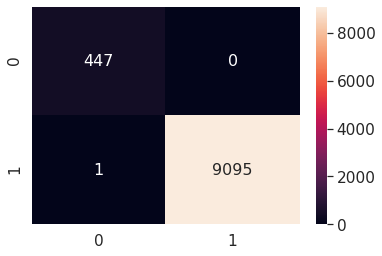

In [ ]:
sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predictions)), annot=True, annot_kws={"size": 16}, fmt='')
plt.show()

In [ ]:

print(sklearn.metrics.precision_score(y_test, predictions))

1.0


In [ ]:
print(sklearn.metrics.recall_score(y_test, predictions))

0.9998900615655233


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data1.csv to test_data1 (1).csv


In [ ]:
import io
test_data1 = pd.read_csv(io.BytesIO(uploaded['test_data1.csv']))

In [ ]:
test_copy = test_data1.copy()

In [ ]:
test_copy.dtypes

INCIDENT_ID     object
DATE            object
X_1              int64
X_2              int64
X_3              int64
X_4              int64
X_5              int64
X_6              int64
X_7              int64
X_8              int64
X_9              int64
X_10             int64
X_11             int64
X_12           float64
X_13             int64
X_14             int64
X_15             int64
Month           object
Year             int64
Day              int64
Date01           int64
dtype: object

In [ ]:
test_data1[['Month','Year','Day','X_1','X_4','X_5','X_9']] = test_data1[['Month','Year','Day','X_1','X_4','X_5','X_9']].apply(lambda x: x.astype('category'))

In [ ]:
test_data1.dtypes

INCIDENT_ID      object
DATE             object
X_1            category
X_2               int64
X_3               int64
X_4            category
X_5            category
X_6               int64
X_7               int64
X_8               int64
X_9            category
X_10              int64
X_11              int64
X_12            float64
X_13              int64
X_14              int64
X_15              int64
Month          category
Year           category
Day            category
Date01            int64
dtype: object

In [ ]:
del test_data1['DATE'],test_data1['INCIDENT_ID']

In [ ]:
test_data1.dtypes

X_1       category
X_2          int64
X_3          int64
X_4       category
X_5       category
X_6          int64
X_7          int64
X_8          int64
X_9       category
X_10         int64
X_11         int64
X_12       float64
X_13         int64
X_14         int64
X_15         int64
Month     category
Year      category
Day       category
Date01       int64
dtype: object

In [ ]:
X_new = pd.get_dummies(test_data1)

In [ ]:
predictions_new = np.array(automl.predict(X_new), dtype = 'int')

In [ ]:
predictions_new

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
!pip install pandas~=0.24.2

In [ ]:
solution2 = pd.DataFrame({"INCIDENT_ID":test_copy.INCIDENT_ID,"MULTIPLE_OFFENSE": predictions_new})
#Score 99.18 rank 26

In [ ]:
sol2 = pd.DataFrame({'INCIDENT_ID' : solution2['INCIDENT_ID'],'MULTIPLE_OFFENSE' :solution2['MULTIPLE_OFFENSE']})
sol2.to_csv('cb_sub1.csv',index=False)

In [ ]:
print(sol2)

      INCIDENT_ID  MULTIPLE_OFFENSE
0       CR_195453                 1
1       CR_103520                 1
2       CR_196089                 1
3       CR_112195                 1
4       CR_149832                 1
5        CR_81654                 1
6       CR_139009                 1
7         CR_6108                 1
8        CR_62283                 1
9         CR_5710                 1
10      CR_188972                 1
11       CR_74490                 1
12       CR_21774                 1
13       CR_82685                 1
14      CR_188343                 1
15      CR_104212                 1
16       CR_49142                 1
17        CR_7923                 1
18      CR_106361                 0
19      CR_153593                 1
20       CR_70128                 1
21      CR_177912                 1
22      CR_119901                 1
23       CR_35246                 1
24      CR_149719                 1
25       CR_99068                 1
26      CR_137684           

In [ ]:

!zip sub.zip cb_sub1.csv

  adding: cb_sub1.csv (deflated 71%)
